In [2]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
from project2 import *
import numpy as np
from matplotlib import pyplot as plt

# Gradient descent

## Simple $p$-degree polynomial + noise

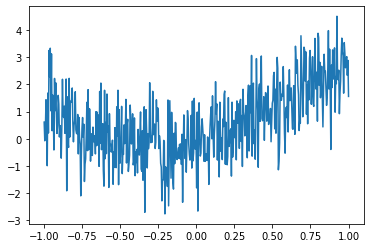

In [3]:
from project2.test import test_func_poly_deg_p
np.random.seed(3155)
avec = np.array([0,1,2])
deg = len(avec)-1
x = np.linspace(-1,1,500)
# using simple linear regression to validate the gradient descent methods
X = np.ones((x.shape[0],deg+1))
for i in range(1,X.shape[1]):
    X[:,i] = x**i
y = test_func_poly_deg_p(deg = deg, avec = avec, x = x)
ynoisy = y + np.random.normal(size=y.shape)
plt.plot(x, ynoisy)

# Scikit optimizations for comparison

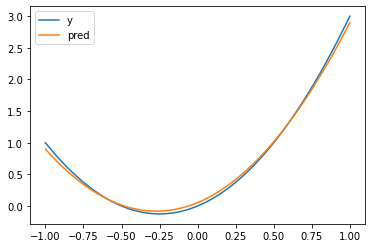

In [4]:
import numpy as np
from sklearn.linear_model import SGDRegressor
reg = SGDRegressor(max_iter=200, tol=1e-4, loss="squared_error")
reg.fit(X, y)
ypred = reg.predict(X)
plt.plot(x, y, label="y")
plt.plot(x, ypred, label="pred")
plt.legend()

## Implementation of GD

In [5]:
# import cost functions
from project2.optimization import cost_Lasso, cost_OLS, cost_Ridge
deg = 4
# use: derivate with respect to the (function, n) nth argument (starts at zero)
from autograd import grad
gradient = grad(cost_OLS,2) # 2 indicates the third argument of the cost functions arguments
max_iter = 2*int(1e3)
theta = np.random.normal(size=(X.shape[1]))
eta = 1e-2
# simple gradent descent with constant learning rate
for niter in range(max_iter):
    gradients = gradient(X, y, theta)
    theta -= eta*gradients

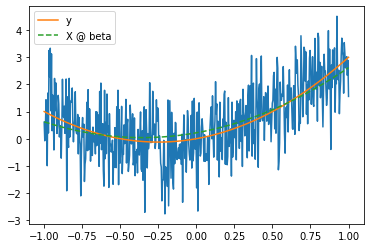

In [6]:
plt.plot(x, ynoisy)
plt.plot(x, y, label='y')
plt.plot(x, X @ theta, ls='--', label="X @ beta")
plt.legend()

## GD
- visualization of descent

In [6]:
from project2.optimization import grad_desc
thetas, bconv = grad_desc(X, y, cost_OLS, eta = 1e-2, check_conv=True, tol=1e-4, store_thetas=True)

/tmp/ipykernel_21809/3267139225.py:15: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  plt.colorbar(sm)


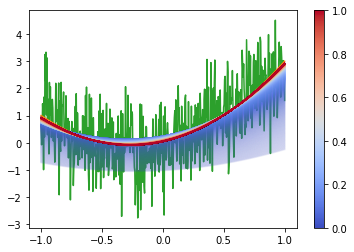

In [7]:
from matplotlib.cm import ScalarMappable
from matplotlib.colors import Normalize
cmap = plt.cm.coolwarm
norm = Normalize(vmin=0, vmax=1)
sm = ScalarMappable(norm=norm, cmap=cmap)

ind_last = len(thetas[~np.isnan(thetas)])//3
theta_last = thetas[~np.isnan(thetas)].reshape((ind_last,3))[-1]
plt.plot(x, ynoisy, "C2")
plt.plot(x, y, "C1")
plt.plot(x, X @ theta_last, ls='--')
[plt.plot(x, X @ thetas[i], 
          color = cmap(np.linspace(0,1,ind_last))[i], 
          alpha = 0.1) for i in range(ind_last)]
plt.colorbar(sm)

# Implementation of GD with momentum

True

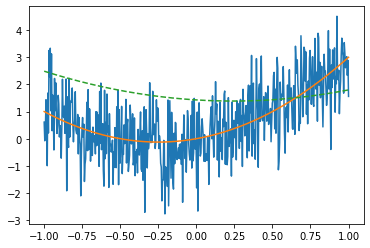

In [8]:
from project2.optimization import grad_desc_mom
theta, bconv = grad_desc_mom(X, y, cost_OLS, eta = 1e-3, delta = 1e-8, check_conv=True, tol=1e-3, max_iter = 5000)
plt.plot(x, ynoisy)
plt.plot(x, y)
plt.plot(x, X @ theta, ls='--')
bconv

### Comparison with GD with same number of max iterations

False

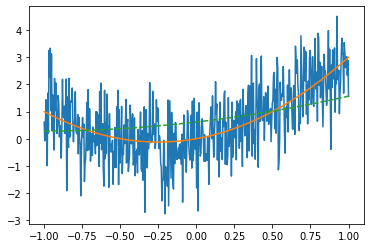

In [9]:
theta, bconv = grad_desc(X, y, cost_OLS, eta = 1e-3, check_conv=True, tol=1e-4, max_iter = 5000)
plt.plot(x, ynoisy)
plt.plot(x, y)
plt.plot(x, X @ theta, ls='--')
bconv

# SGD

False

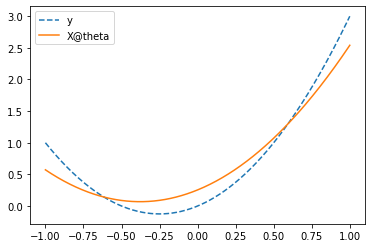

In [29]:
from project2.optimization import SGD
theta, bconv = SGD(X=X, y=y, cost_func=cost_OLS, 
                   eta=1e-2, delta=14e-9, nepochs=500, nmb=10, batch_pick="random", 
                   **{'t0' : 1, 't1' : 100, 'scheme': 'time_decay_rate'})
plt.plot(x, y, label='y', ls='--')
plt.plot(x, X @ theta, label='X@theta')
plt.legend()
bconv

False

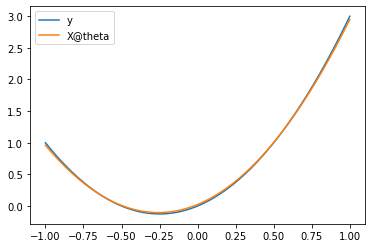

In [36]:
from project2.optimization import SGD
theta, bconv = SGD(X=X, y=y, cost_func=cost_Ridge, 
                   eta=1e-3, delta=1e-8, nepochs=200, nmb=20, batch_pick="random", 
                   **{'lambda' : 1e-3, 't0' : 5e-1, 't1' :1e-3, 'scheme': 'exp'})
plt.plot(x, y, label='y')
plt.plot(x, X @ theta, label='X@theta')
plt.legend()
bconv

# Adagrad

## with SGD

False

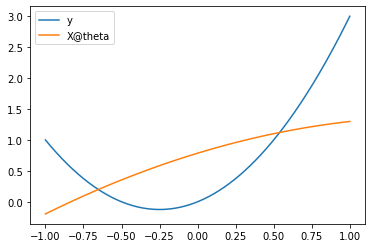

In [95]:
from project2.optimization import ADAgrad_sgd
theta, bconv = ADAgrad_sgd(X=X, y=y, cost_func=cost_Lasso, eta=1e-2, 
                           gamma = 1e-3, delta=1e-8, w_mom = False, nepochs=300, 
                           nmb=10, batch_pick="random", **{'lambda' : 1e-5})
plt.plot(x, y, label='y')
plt.plot(x, X @ theta, label='X@theta')
plt.legend()
bconv


## with GD

False

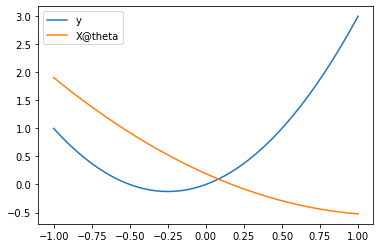

In [13]:
from project2.optimization import ADAgrad_gd
theta, bconv = ADAgrad_gd(X=X, y=y, cost_func=cost_OLS, eta=1e-3, 
                          gamma = 1e-2,delta=1e-8, w_mom = False)
plt.plot(x, y, label='y')
plt.plot(x, X @ theta, label='X@theta')
plt.legend()
bconv

# RMS prop

False

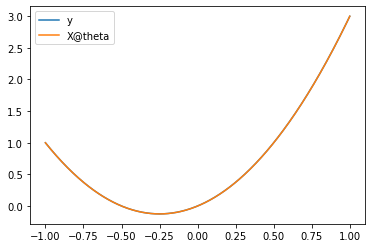

In [14]:
from project2.optimization import RMSprop
theta, bconv = RMSprop(X=X, y=y, cost_func=cost_OLS, eta=1e-3, beta = 0.99, 
                       delta=1e-8, w_mom = False, nepochs=400, 
                       nmb=15, batch_pick="random", **{})
plt.plot(x, y, label='y')
plt.plot(x, X @ theta, label='X@theta')
plt.legend()
bconv

# ADAM

False

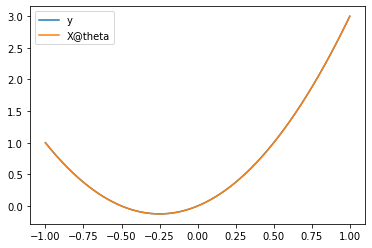

In [15]:
from project2.optimization import ADAM
theta, bconv = ADAM(X=X, y=y, cost_func=cost_OLS, eta=1e-3, beta1 = 1e-1, beta2 = 1e-1, 
                    delta=1e-8, w_mom = False, nepochs=400, nmb=15, batch_pick="random", **{})
plt.plot(x, y, label='y')
plt.plot(x, X @ theta, label='X@theta')
plt.legend()
bconv